***Nombre: Daniel Andree Arancibia Aguilar***

***Carrera: Ingeniería en Ciencias de la Computación***

***Grupo Lab: 1***

**Para este laboratorio implementaremos y compararemos modelos de regresión a partir de un dataset que cumpla los requisitos de al menos 6 columnas y 10000 filas **

**Dataset usado**
https://www.kaggle.com/datasets/thedevastator/improving-naval-vessel-condition-through-machine/data

**Nombre del Dataset: Predictive Maintenance:** Naval Vessel Condition

**Formato:** 18 Columnas (solo se usará 8 de las 18 debido a la diferencia entre datos) 11934 Filas

**Variables de entrada:**

1 Presión de salida de la turbina de alta presión (P48)

2 Presión de entrada de aire del compresor de la turbina de gas (P1)

3 Presión de salida de aire del compresor de la turbina de gas (P2)

4 Presión de gases de escape de la turbina de gas (Pexh)

5 Control de inyección de la turbina

6 Flujo de combustible

7 Coeficiente de degradación del compresor de la turbina de gas

**Variable de salida Y:**

Coeficiente de estado de degradación de la turbina de gas

**Importar carpetas de drive**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


***Importar Librerias***

importamos numpy para trabajar operaciones con matrices

matplotlib para graficar en python

sklearn para la regresion linear, polinomial y calcular errores

In [2]:
import os
import numpy as np
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline

**1: Regresión Lineal Multivariable**



Es una técnica de aprendizaje automático utilizada para predecir una variable de salida continua mediante el análisis de múltiples variables de entrada. Es especialmente útil para modelar relaciones lineales entre diversas variables de entrada y una única variable de salida continua.

**Cargar Datos** Cargamos los datos del dataset para ser usados y mostramos algunos datos

In [ ]:
data = np.loadtxt('/content/gdrive/MyDrive/SIS420/midataset/EcNormal Maintenance Naval Vessel.csv', delimiter=',')
X = data[:, :7]
y = data[:, 7]
m = y.size
print("Tamaño de etiquetas:", m)
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X[:,0]','X[:, 1]', 'X[:, 2]','X[:, 3]','X[:, 4]','X[:, 5]','X[:, 6]', 'y'))
print('-'*16)
for i in range(50):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}'.format(X[i, 0], X[i, 1],X[i, 2],X[i, 3],X[i, 4],X[i, 5],X[i, 6], y[i]))


Tamaño de etiquetas: 11934
  X[:,0] X[:, 1] X[:, 2] X[:, 3] X[:, 4] X[:, 5]
----------------
       1       1       6       1       7       0
       1       1       7       1      11       0
       1       1       8       1      13       0
       2       1       9       1      18       0
       2       1      11       1      26       1
       3       1      13       1      36       1
       3       1      16       1      46       1
       4       1      19       1      62       1
       4       1      23       1      93       2
       1       1       6       1       4       0
       1       1       7       1      13       0
       1       1       8       1      13       0
       2       1       9       1      18       0
       2       1      11       1      26       1
       3       1      13       1      36       1
       3       1      16       1      46       1
       4       1      19       1      62       1
       4       1      23       1      92       2
       1       1       6 

**Normalizar Caracteristicas**
Este es un paso importante en el preprocesamiento de datos en aprendizaje automático, transformamos las caracteristicas a valores similares para hacer que converjan mas rápido

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

(En el caso de mi dataset tuve que eliminar los valores de 0 que existen en las columnas)

In [3]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    zero_std_indices = np.where(sigma == 0)[0]
    X_norm = np.delete(X_norm, zero_std_indices, axis=1)
    mu = np.delete(mu, zero_std_indices)
    sigma = np.delete(sigma, zero_std_indices)

    X_norm = (X_norm - mu) / sigma

    return X_norm, mu, sigma

**Graficar las caracteristicas para mejorar la comparacion**

In [ ]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

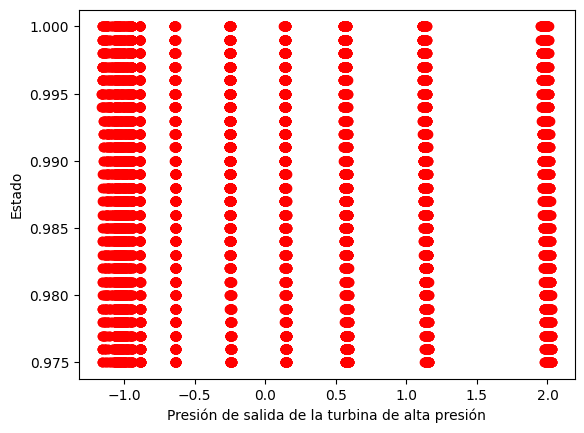

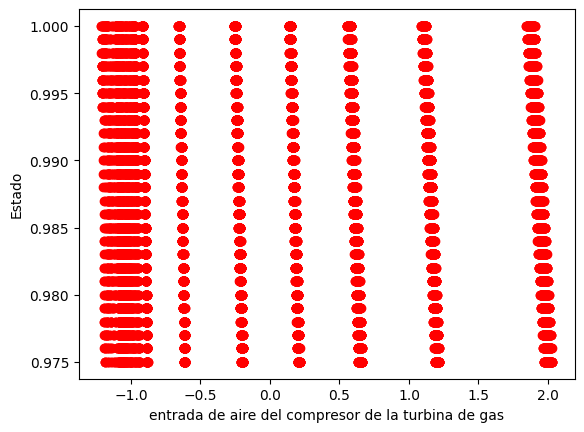

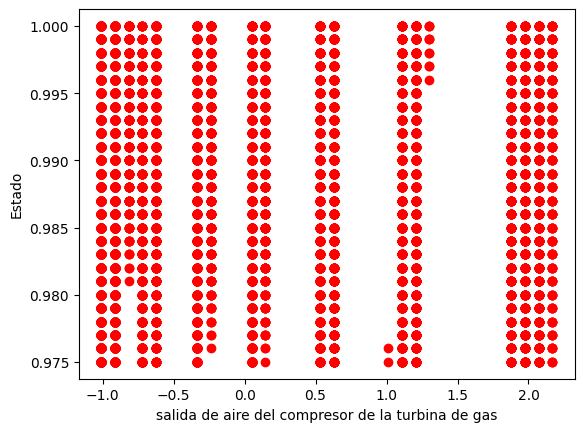

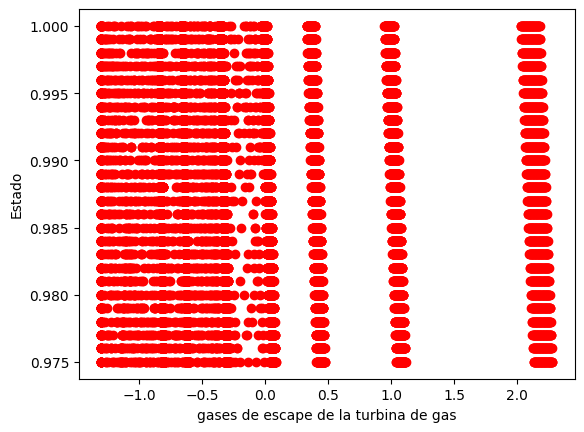

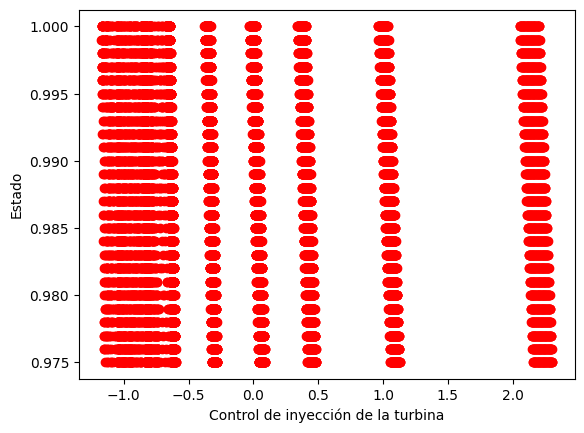

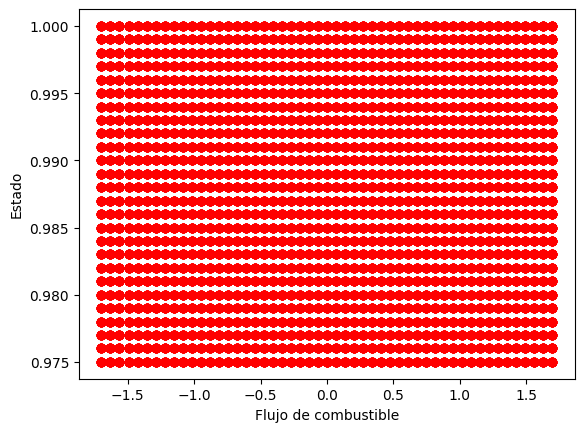

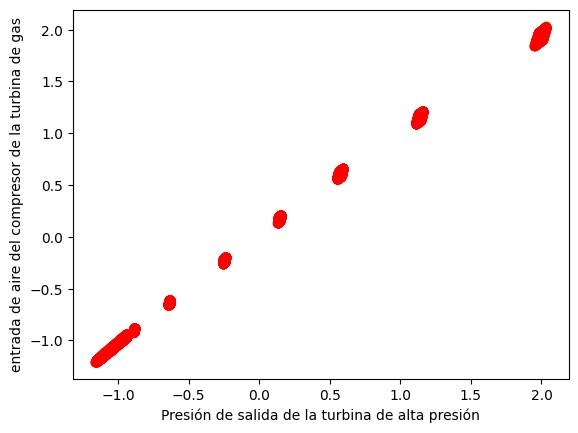

In [ ]:
xlabel1 = "Presión de salida de la turbina de alta presión"
xlabel2 = "entrada de aire del compresor de la turbina de gas"
xlabel3 = "salida de aire del compresor de la turbina de gas"
xlabel4 = "gases de escape de la turbina de gas"
xlabel5 = "Control de inyección de la turbina"
xlabel6 = "Flujo de combustible"
xlabel7 = "Coeficiente de degradación del compresor de la turbina de gas"

ylabel1 = "Estado"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y, xlabel6, ylabel1)



graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)

**Imprimimos las caracteristicas normalizadas**



In [ ]:
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 1.         -1.15878524  1.         ... -1.02569556 -1.14460218
  -1.69841555]
 [ 1.         -0.94214038  1.         ... -0.88955153 -0.74035095
  -1.69841555]
 [ 1.         -0.88867058  1.         ... -0.7954736  -0.79556576
  -1.69841555]
 ...
 [ 1.          0.57990501  1.         ...  0.32750183  0.33830963
   1.69841555]
 [ 1.          1.14410355  1.         ...  0.94514219  0.95947615
   1.69841555]
 [ 1.          2.00791732  1.         ...  2.02883787  2.05391239
   1.69841555]]
Media calculada: [ 4.24833808e-14 -3.00368634e-15 -4.71912467e-12 -4.06181243e-15
  7.12682432e-15  3.08090090e-12]
Desviación estandar calculada: [1. 1. 1. 1. 1. 1.]
[[-1.15878524 -1.18978002 -1.00809026 -1.02569556 -1.14460218 -1.69841555]
 [-0.94214038 -0.93965002 -1.00809026 -0.88955153 -0.74035095 -1.69841555]
 [-0.88867058 -0.88493993 -0.91184278 -0.7954736  -0.79556576 -1.69841555]
 ...
 [ 0.57990501  0.58511247  0.62811678  0.32750183  0.33830963  1.69841555]
 [ 1.14410355  1.12340722  1.3018490

**Se agrega un termino de interseccion**

Agregamos una columna de 1 a los datos de entrada ya que nos permite representar el término como un parámetro independiente que multiplica a la columna de unos. Esto nos da la flexibilidad de ajustar el modelo para que se ajuste mejor a los datos

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -1.15878524 -1.18978002 ... -1.02569556 -1.14460218
  -1.69841555]
 [ 1.         -0.94214038 -0.93965002 ... -0.88955153 -0.74035095
  -1.69841555]
 [ 1.         -0.88867058 -0.88493993 ... -0.7954736  -0.79556576
  -1.69841555]
 ...
 [ 1.          0.57990501  0.58511247 ...  0.32750183  0.33830963
   1.69841555]
 [ 1.          1.14410355  1.12340722 ...  0.94514219  0.95947615
   1.69841555]
 [ 1.          2.00791732  1.90489952 ...  2.02883787  2.05391239
   1.69841555]]


In [ ]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

**Probamos con una theta para obtener el estado**

Esto para hacer predicciones sobre nuevos datos de entrada en el modelo


In [ ]:
def calcularEstado(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [ ]:
theta=np.array([1.001, 0.081, 1.005,1.145, 0.4, 0.1,0.26])
JJ = calcularEstado(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un estado de: {JJ}")

con theta:[1.001 0.081 1.005 1.145 0.4   0.1   0.26 ] se obtiene un costo de: 3.7413517664937173


In [17]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


**Descenso por el gradiente**

 Minimiza una función de costo que mide la diferencia entre las predicciones del modelo y los valores reales, este proceso se repite hasta que se alcanza un punto de convergencia donde la función de costo se minimiza o se estabiliza

In [14]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

**Seleccionar coheficientes de aprendizaje para hacer la predicción**



theta calculado por el descenso por el gradiente: [ 9.87500000e-01  1.09976669e-03 -2.44399919e-03  4.16196506e-03
 -1.28207692e-03 -1.62033628e-03 -1.93393853e-04]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 1.0848


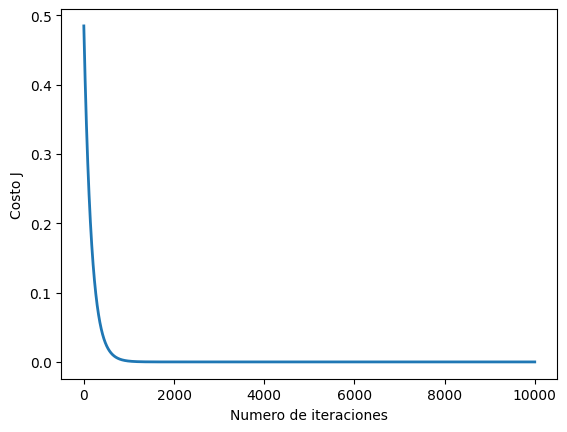

In [ ]:
alpha = 0.003
num_iters = 10000

theta = np.zeros(7)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1.096, 0.998, 0.947, 1.019, 0.137, 0.082, 0.95]
X_array[1:7] = (X_array[1:7] - mu) / sigma
estado = np.dot(X_array, theta)

print('El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): {:.4f}'.format(estado))


**Graficamos los datos junto a su regresion lineal**

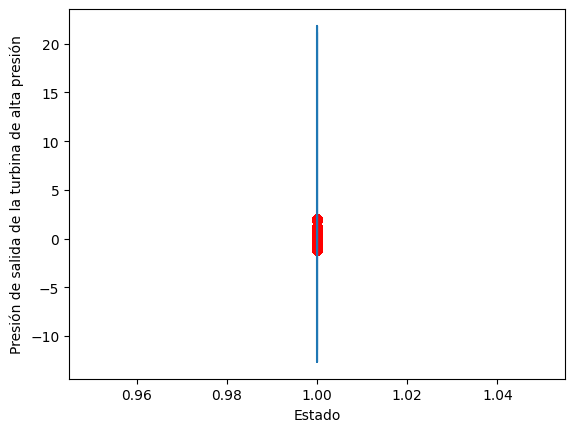

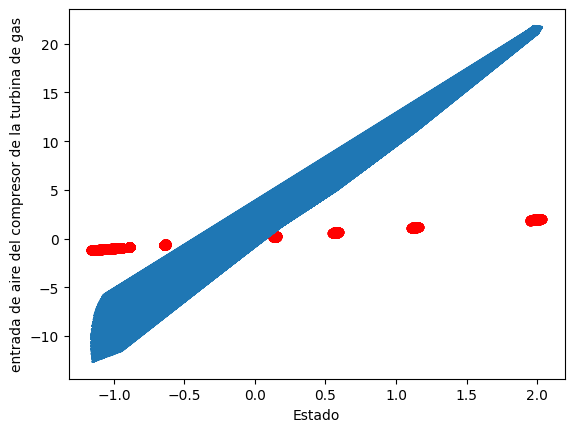

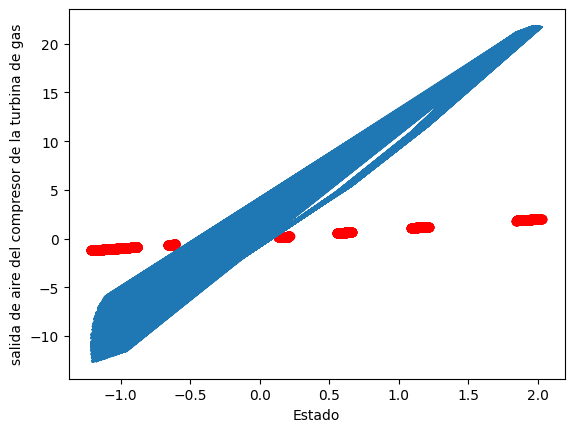

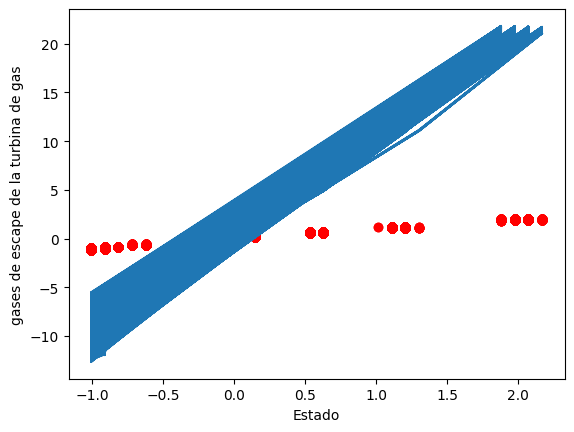

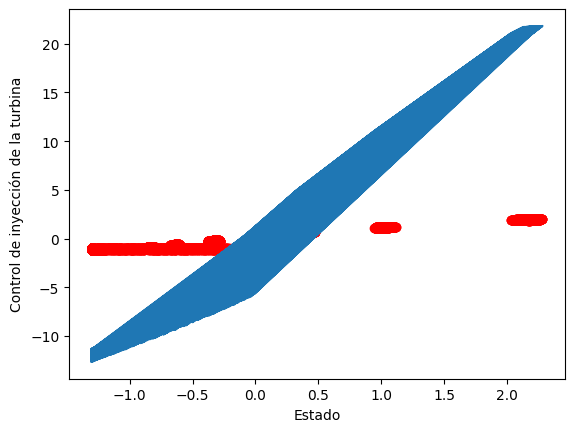

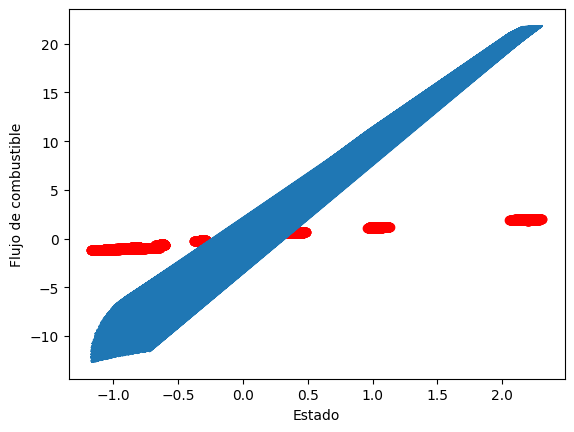

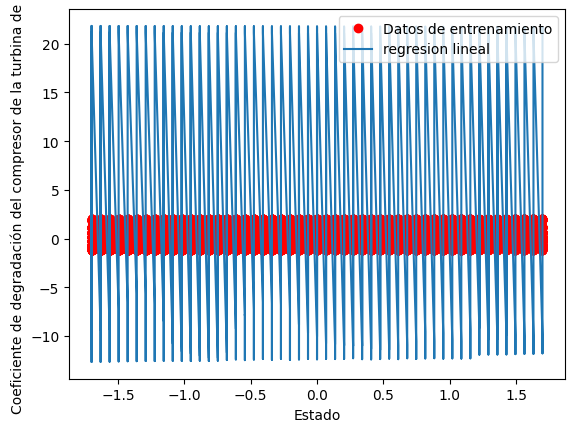

In [ ]:
graficarDatos(X_ready[:, 0], X_ready[:, 2], ylabel1, xlabel1)
pyplot.plot(X_ready[:, 0], np.dot(X_ready, theta), '-')

graficarDatos(X_ready[:, 1], X_ready[:, 2], ylabel1, xlabel2)
pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

graficarDatos(X_ready[:, 2], X_ready[:, 2], ylabel1, xlabel3)
pyplot.plot(X_ready[:, 2], np.dot(X_ready, theta), '-')

graficarDatos(X_ready[:, 3], X_ready[:, 2], ylabel1, xlabel4)
pyplot.plot(X_ready[:, 3], np.dot(X_ready, theta), '-')

graficarDatos(X_ready[:, 4], X_ready[:, 2], ylabel1, xlabel5)
pyplot.plot(X_ready[:, 4], np.dot(X_ready, theta), '-')

graficarDatos(X_ready[:, 5], X_ready[:, 2], ylabel1, xlabel6)
pyplot.plot(X_ready[:, 5], np.dot(X_ready, theta), '-')

graficarDatos(X_ready[:, 6], X_ready[:, 2], ylabel1, xlabel7)
pyplot.plot(X_ready[:, 6], np.dot(X_ready, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

**Calculamos la Y predicha**

Multiplicamos las caracteristicas con la theta y este proceso nos da una estimación de la variable de salida

In [ ]:
y_pred = np.dot([1, 0.45, 1.54,0.978,1.7,1.645,0.005], theta)
print(y_pred)

4.5507599999999995


**10 Predicciones de Ejemplo Regresion Linear Multivariable**

In [ ]:
for i in range(10):
    X_array = np.random.rand(7) * np.random.randint(1, 2, size=7)
    print("Ejemplo", i+1, ":", X_array)
    X_array[1:7] = (X_array[1:7] - mu) / sigma
    estado = np.dot(X_array, theta)

    print('El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): {:.4f}'.format(estado))

Ejemplo 1 : [0.59185761 0.78131957 0.08736291 0.01917914 0.42186888 0.54103115
 0.58906329]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 0.5837
Ejemplo 2 : [0.97671164 0.05958902 0.71556104 0.99644018 0.84203629 0.62371709
 0.52741842]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 0.9648
Ejemplo 3 : [0.85963724 0.90167748 0.07069713 0.90975    0.09989715 0.76752651
 0.25146542]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 0.8521
Ejemplo 4 : [0.74877558 0.37175167 0.198879   0.95053213 0.85233717 0.97665788
 0.86713039]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 0.7405
Ejemplo 5 : [0.1910386  0.1443043  0.20643462 0.51705826 0.02896758 0.99409987
 0.49510229]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 0.1887
Ejemplo 6 : [0.46475158 0.5566

**2: Regresión Polinomial**

La regresión polinomial es una extensión de la regresión lineal que permite modelar relaciones no lineales entre las variables de entrada y salida. Ajusta un polinomio de grado a los datos en lugar de una línea recta

Recargamos el dataset para este caso

In [4]:
data = np.loadtxt('/content/gdrive/MyDrive/SIS420/midataset/EcNormal Maintenance Naval Vessel.csv', delimiter=',')
X = data[:, :7]
y = data[:, 7]
m = y.size
print("Tamaño de etiquetas:", m)
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}'.format('X[:,0]','X[:, 1]', 'X[:, 2]','X[:, 3]','X[:, 4]','X[:, 5]','X[:, 6]', 'y'))
print('-'*16)
for i in range(50):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}'.format(X[i, 0], X[i, 1],X[i, 2],X[i, 3],X[i, 4],X[i, 5],X[i, 6], y[i]))


Tamaño de etiquetas: 11934
  X[:,0] X[:, 1] X[:, 2] X[:, 3] X[:, 4] X[:, 5]
----------------
       1       1       6       1       7       0
       1       1       7       1      11       0
       1       1       8       1      13       0
       2       1       9       1      18       0
       2       1      11       1      26       1
       3       1      13       1      36       1
       3       1      16       1      46       1
       4       1      19       1      62       1
       4       1      23       1      93       2
       1       1       6       1       4       0
       1       1       7       1      13       0
       1       1       8       1      13       0
       2       1       9       1      18       0
       2       1      11       1      26       1
       3       1      13       1      36       1
       3       1      16       1      46       1
       4       1      19       1      62       1
       4       1      23       1      92       2
       1       1       6 

In [5]:
print(X)

[[1.0960e+00 9.9800e-01 5.9470e+00 ... 7.1370e+00 8.2000e-02 9.5000e-01]
 [1.3310e+00 9.9800e-01 7.2820e+00 ... 1.0655e+01 2.8700e-01 9.5000e-01]
 [1.3890e+00 9.9800e-01 7.5740e+00 ... 1.3086e+01 2.5900e-01 9.5000e-01]
 ...
 [2.9820e+00 9.9800e-01 1.5420e+01 ... 4.2104e+01 8.3400e-01 1.0000e+00]
 [3.5940e+00 9.9800e-01 1.8293e+01 ... 5.8064e+01 1.1490e+00 1.0000e+00]
 [4.5310e+00 9.9800e-01 2.2464e+01 ... 8.6067e+01 1.7040e+00 1.0000e+00]]


**Normalización**

Hacemos la normalización para los datos recargados

In [6]:
X_norm, mu, sigma = featureNormalize(X)

Concatenamos nuevamente la columna de unos

In [7]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -1.15878524  1.         ... -1.02569556 -1.14460218
  -1.69841555]
 [ 1.         -0.94214038  1.         ... -0.88955153 -0.74035095
  -1.69841555]
 [ 1.         -0.88867058  1.         ... -0.7954736  -0.79556576
  -1.69841555]
 ...
 [ 1.          0.57990501  1.         ...  0.32750183  0.33830963
   1.69841555]
 [ 1.          1.14410355  1.         ...  0.94514219  0.95947615
   1.69841555]
 [ 1.          2.00791732  1.         ...  2.02883787  2.05391239
   1.69841555]]


**Descenso por el gradiente**

theta calculado por el descenso por el gradiente: [ 4.93750000e-01  1.09976669e-03  4.93750000e-01 -2.44399919e-03
  4.16196505e-03 -1.28207692e-03 -1.62033628e-03 -1.93393853e-04]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 1.3168


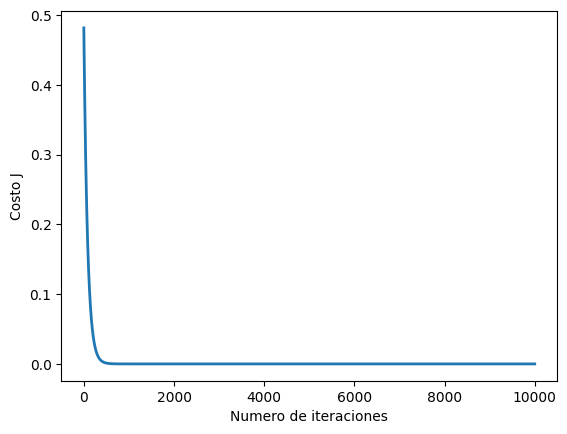

In [16]:
alpha = 0.003
num_iters = 10000

theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1.658, 0.998, 1.007, 1.022, 0.109, 0.358, 0.95]
X_array[1:7] = (X_array[0:7] - mu) / sigma
estado = np.dot(X_array, theta)

print('El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): {:.4f}'.format(estado))


In [21]:
for i in range(10):
    X_array = np.random.rand(8) * np.random.randint(1, 2, size=8)
    print("Ejemplo", i+1, ":", X_array)
    X_array[0:7] = (X_array[0:7] - mu) / sigma
    estado = np.dot(X_array, theta)

    print('El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): {:.4f}'.format(estado))

Ejemplo 1 : [0.62205877 0.36320777 0.59813284 0.77253328 0.60470413 0.77572258
 0.06371978 0.03453537]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): -2755537312.8351
Ejemplo 2 : [0.41133845 0.01306033 0.66279106 0.29326399 0.04495204 0.61902393
 0.60925916 0.45969321]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): -4275474489.1461
Ejemplo 3 : [0.25334288 0.80707916 0.67621025 0.03274222 0.28602517 0.42197626
 0.90010259 0.09932065]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): -828758579.5118
Ejemplo 4 : [0.57272993 0.99854634 0.2030167  0.8652606  0.66651094 0.4710292
 0.37453418 0.09331484]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 2371568.1289
Ejemplo 5 : [0.7359959  0.59819742 0.06390696 0.06892448 0.39718631 0.28570529
 0.42839522 0.48994151]
El estado de degradación de la turbina de g

**Graficamos cada columna**

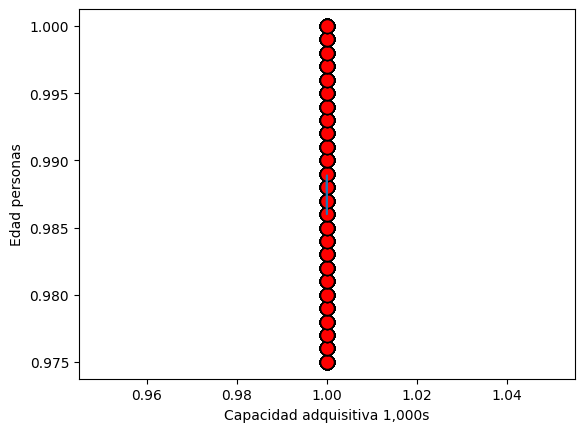

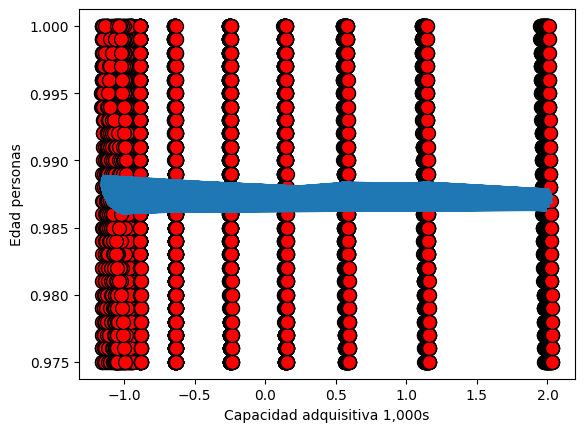

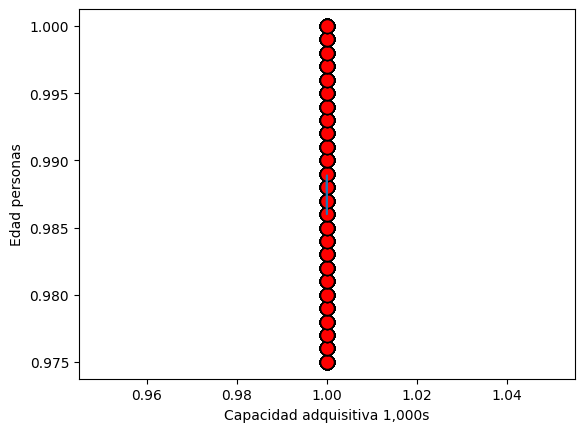

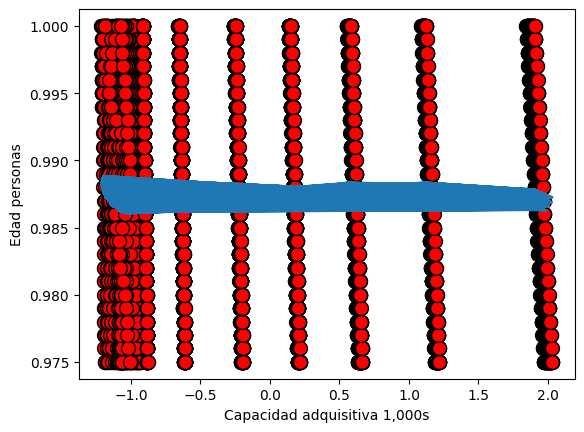

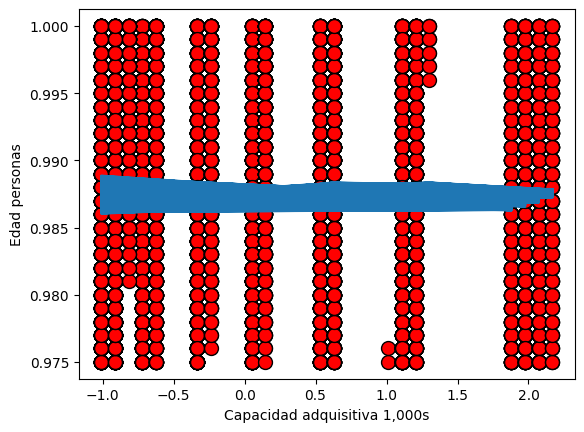

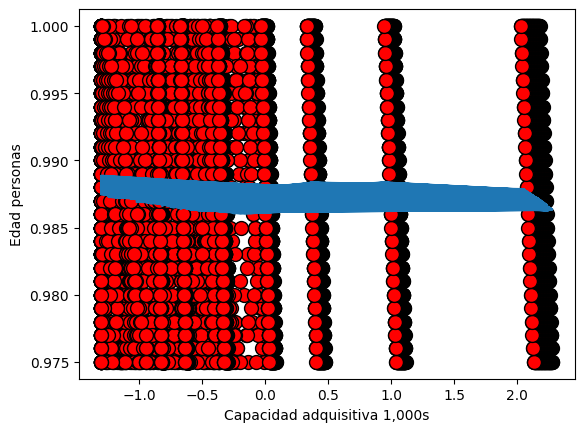

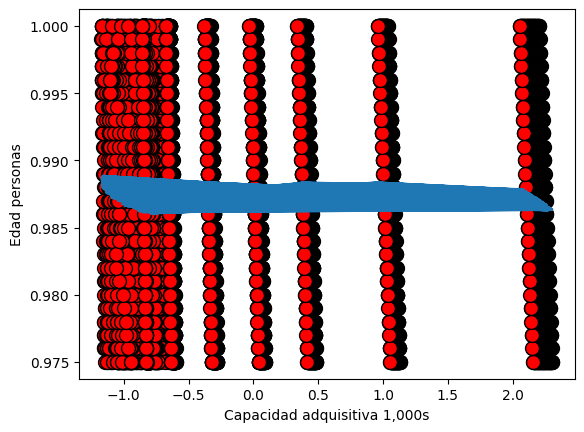

In [18]:
for i in range(7):
  plotData(X[:, i], y)
  pyplot.plot(X[:, i], np.dot(X, theta), '-')

**3: Ecuación de la Normal**

La ecuación de la distribución normal describe cómo se distribuyen las probabilidades en función de la media y la varianza de la distribución.

Se cargan el dataset nuevamente para la ecuación de la normal

In [ ]:
data = np.loadtxt('/content/gdrive/MyDrive/SIS420/midataset/Maintenance Naval Vessel.csv', delimiter=',')
X = data[:, :7]
y = data[:, 7]
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

11934


Agregamos la funcion de la ecuación de la normal

In [ ]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

Hacemos el calculo de theta haciendo uso de la ecuación de la Normal

In [ ]:
theta = normalEqn(X, y);
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));
X_array = [1.096, 0.998, 0.947, 1.019, 0.137, 0.082, 0.95,0.975]
estado = np.dot(X_array, theta)

print('El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): {:.4f}'.format(estado))


Theta calculado a partir de la ecuación de la normal: [-4.99833706e+00  3.45471433e-01  9.35530824e+00 -5.19989283e-02
 -3.35833630e+00  1.42029362e-04 -1.31411436e-01 -2.11647854e-02]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 3.0675


**10 Predicciones de Ejemplo Ecuación de la Normal**

In [ ]:
for i in range(10):
    X_array = np.random.rand(8) * np.random.randint(1, 2, size=8)
    print("Ejemplo", i+1, ":", X_array)
    estado = np.dot(X_array, theta)

    print('El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): {:.4f}'.format(estado))

Ejemplo 1 : [0.15438261 0.98710409 0.44038972 0.26978626 0.69657201 0.7849525
 0.06977525 0.2739145 ]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 1.3211
Ejemplo 2 : [0.7999113  0.01658345 0.71343121 0.59862953 0.4475618  0.50285691
 0.28550033 0.49764156]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): 1.0997
Ejemplo 3 : [0.61862726 0.77774818 0.01247763 0.24620545 0.66214078 0.29849479
 0.34303558 0.68742838]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): -5.0028
Ejemplo 4 : [0.71431691 0.07168177 0.62145061 0.7440978  0.88878634 0.0882175
 0.26758482 0.92697731]
El estado de degradación de la turbina de gas predecido (usando el descenso por el gradiente): -0.8101
Ejemplo 5 : [0.05122015 0.04651625 0.67402515 0.42973372 0.2245549  0.3386734
 0.84009835 0.38681309]
El estado de degradación de la turbina de gas predecido (usando el descenso po



Para analizar los datos, use los 3 modelos de regresión que : la regresión lineal multivariable para modelar relaciones entre múltiples variables de entrada y una variable de salida continua, para la regresión polinomial extendí la regresión lineal para probar relaciones no lineales, y la ecuación de la normal para comprender la distribución de probabilidades en mis datos, hice 10 predicciones con cada modelo